In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve , auc , classification_report , confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv(r"C:\\Users\\lenovo\\Documents\\creditcard.csv")
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Null values

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

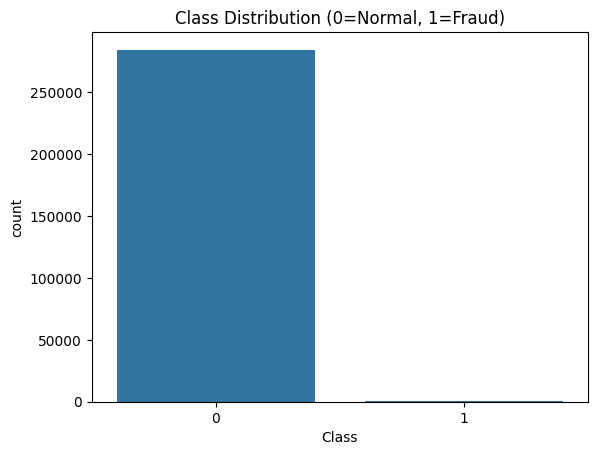

In [8]:

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0=Normal, 1=Fraud)")
plt.show()


In [9]:
#Chk for repeated rows
df.duplicated().sum()


np.int64(1081)

Drop the repeated rows


In [10]:
df = df.drop_duplicates()

Scaling 

In [11]:
sc = StandardScaler()
df[['Amount', 'Time']] = sc.fit_transform(df[['Amount', 'Time']])

In [12]:
df["Amount"].head(20)

0     0.244200
1    -0.342584
2     1.158900
3     0.139886
4    -0.073813
5    -0.338670
6    -0.333399
7    -0.190387
8     0.018879
9    -0.338630
10   -0.322177
11   -0.313431
12    0.131899
13   -0.243502
14   -0.118502
15   -0.289469
16   -0.301450
17   -0.349773
18   -0.166425
19   -0.333359
Name: Amount, dtype: float64

Outliers


In [13]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 31685


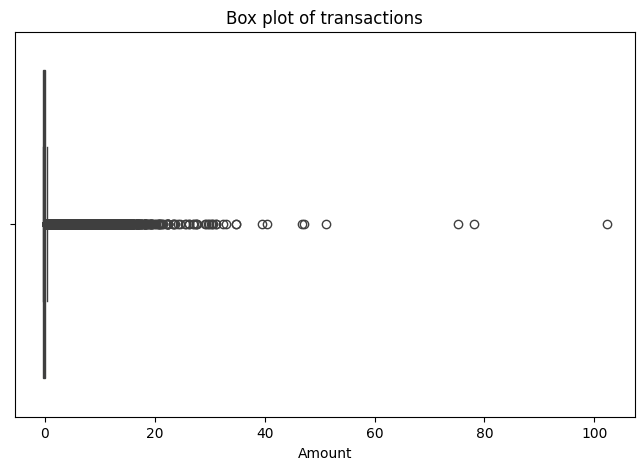

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Amount'])
plt.title("Box plot of transactions")
plt.show()


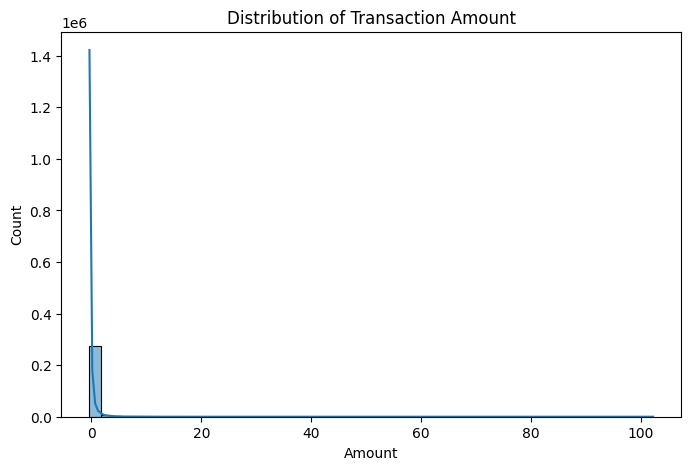

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amount")
plt.show()


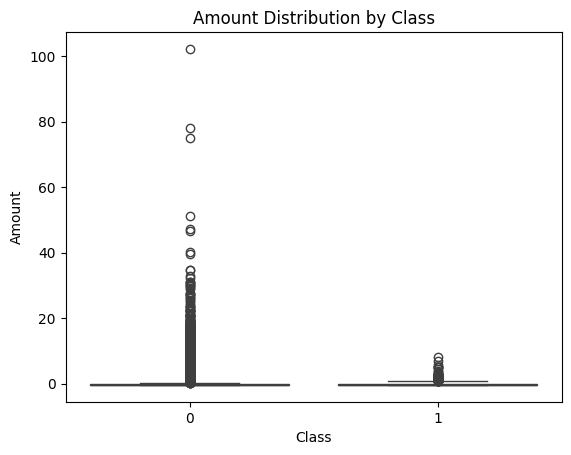

In [16]:
# plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount Distribution by Class")
plt.show()


In [17]:
print(df['Amount'].min(), df['Amount'].max())

-0.35332684547010107 102.24756383799074


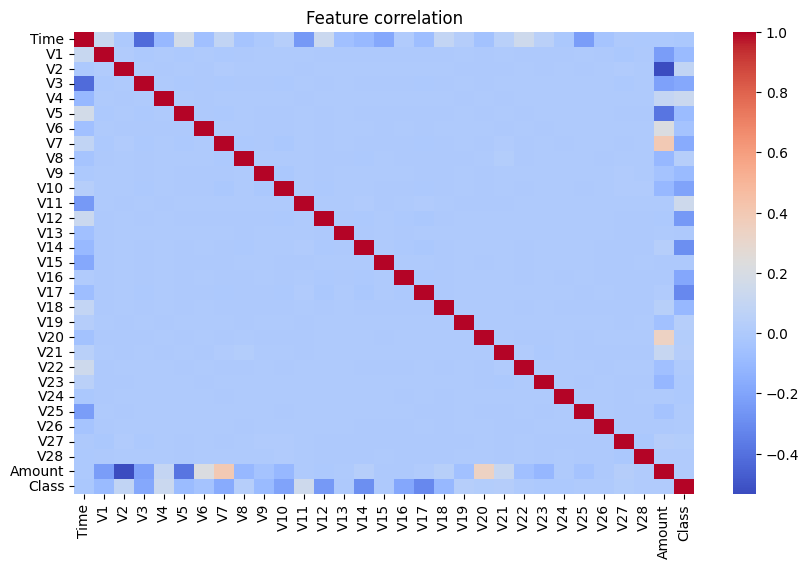

In [18]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr() , annot=False , cmap='coolwarm' )
plt.title("Feature correlation")
plt.show()

Train Test split

In [19]:
X = df.drop(columns=['Class'])
y = df['Class']

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X , y , random_state=42 , test_size=0.2 , stratify=y)

TRY SMOTE to balancing the dataset

In [21]:
sm = SMOTE(random_state=42)
X_train_res , y_train_res = sm.fit_resample(X_train , y_train)
print("Before:", y_train.value_counts())
print("After:", y_train_res.value_counts())

Before: Class
0    226602
1       378
Name: count, dtype: int64
After: Class
0    226602
1    226602
Name: count, dtype: int64


ROC AND AUC

In [22]:
def plot_auc_roc(model ,X_test , y_test , model_name):
    # Get probabilities for the positive class (fraud = 1)
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr , tpr , _ = roc_curve(y_test , y_probs)
    roc_auc = auc(fpr , tpr)
    plt.figure(figsize=(8 , 6))
    plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})') 
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

Precison-recall curve

In [23]:
def plot_precision_recall(model, X_test, y_test, model_name):
    # Probabilities for positive class
    y_probs = model.predict_proba(X_test)[:, 1]

    precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
    avg_precision = average_precision_score(y_test, y_probs)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, marker='.', label=f'AP = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision–Recall Curve - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

Logistic Regression

[[55172  1479]
 [   12    83]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56651
           1       0.05      0.87      0.10        95

    accuracy                           0.97     56746
   macro avg       0.53      0.92      0.54     56746
weighted avg       1.00      0.97      0.99     56746



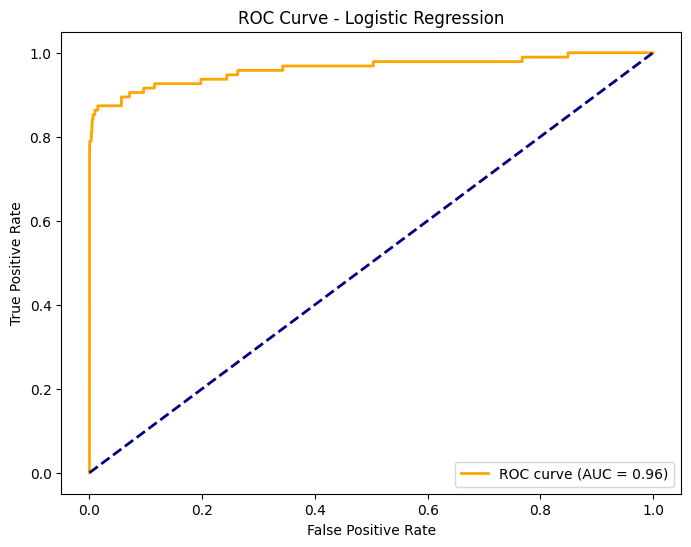

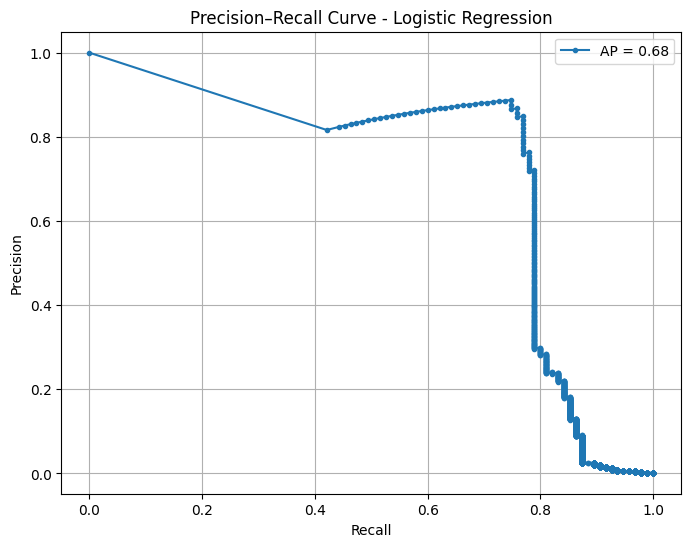

In [24]:
lr = LogisticRegression(random_state=42 , max_iter=1000)
lr.fit(X_train_res , y_train_res)
lr_pred = lr.predict(X_test)
print(confusion_matrix(y_test , lr_pred))
print(classification_report(y_test , lr_pred ))
plot_auc_roc(lr , X_test , y_test , "Logistic Regression")
plot_precision_recall(lr, X_test, y_test, "Logistic Regression")

HyperParamenter tuning for logistic reg using grid search cv

In [ ]:
param_grid_lr = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

# Grid Search (with recall as scoring since fraud detection cares about recall)
grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    scoring='recall',        # you can also try 'f1' if you want a balance
    cv=5,                    # 5-fold cross validation
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_res, y_train_res)

# Best model and parameters
print("Best Params:", grid_search.best_params_)
best_lr = grid_search.best_estimator_

# Evaluate on test data
y_pred = best_lr.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

plot_auc_roc(best_lr , X_test , y_test , "Logistic Regression (Tuned)")
plot_precision_recall(best_lr , X_test , y_test , "Logistic Regression (Tuned)")